# 1. Autocorrelation

'babies.zip` contains baby name frequencies per year (one file per year). You can treat each baby name as a time series.

1. Get the autocorrelation and partial autocorrelation for the names `Olivia`, `Newton` and `John`.

2. Which name do you expect to be the most popular in 2022? Use an ARIMA model and backtesting to pick 3 interesting candidates. Support your findings with a plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import zipfile

df = pd.DataFrame()
cols = ['name', 'gender', 'count'] 
with zipfile.ZipFile("data/babies.zip") as z:
    for file in z.namelist():
        if 'yob' in file:
            with z.open(file) as f:
                temp = pd.read_csv(f, names=cols)
                temp['year'] = file[3:7]
                df = pd.concat([df, temp])

In [3]:
#Get the autocorrelation and partial autocorrelation for the names Olivia, Newton and John.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime

df.year = pd.to_datetime(df.year)
df = df.set_index("year")

In [4]:
df

,name,gender,count
year,,,
1884-01-01,Mary,F,9217
1884-01-01,Anna,F,3860
1884-01-01,Emma,F,2587
1884-01-01,Elizabeth,F,2549
1884-01-01,Minnie,F,2243
...,...,...,...
1883-01-01,Titus,M,5
1883-01-01,Toney,M,5
1883-01-01,Verna,M,5


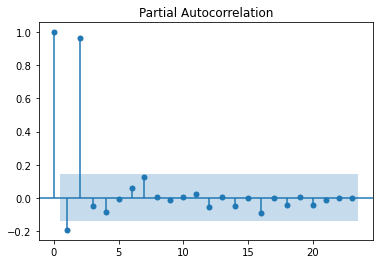

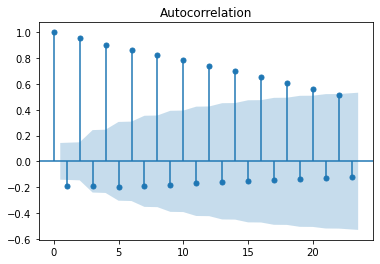

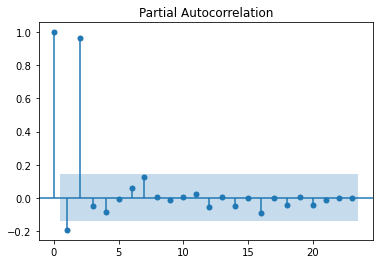

In [5]:
plot_acf(df['count'].loc[df.name == "Olivia"])
plot_pacf(df['count'].loc[df.name == "Olivia"])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


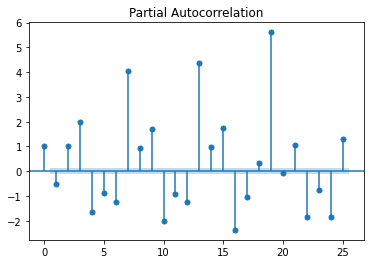

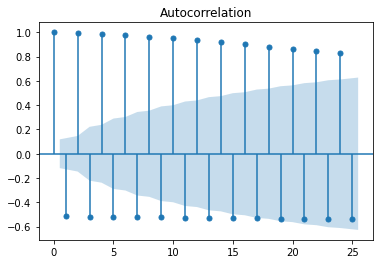

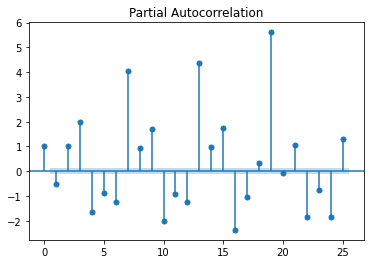

In [6]:
plot_acf(df['count'].loc[df.name == "John"])
plot_pacf(df['count'].loc[df.name == "John"])

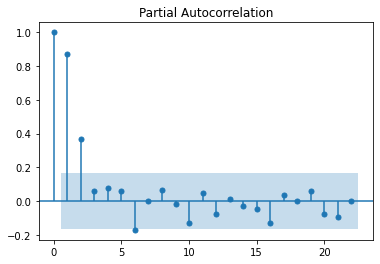

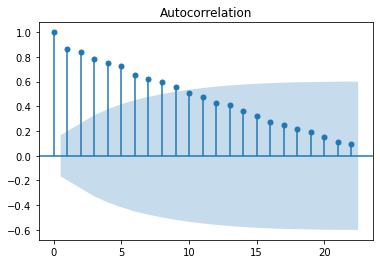

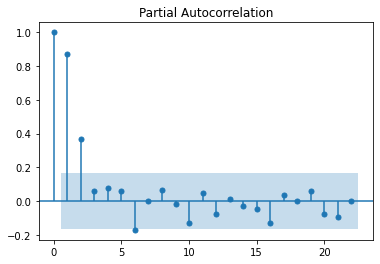

In [7]:
plot_acf(df['count'].loc[df.name == "Newton"])
plot_pacf(df['count'].loc[df.name == "Newton"])

In [8]:
#Which name do you expect to be the most popular in 2022? 
#Use an ARIMA model and backtesting to pick 3 interesting candidates. Support your findings with a plot

#Make the dataframe more recent, say the last 5 years of the df

df = pd.DataFrame()
cols = ['name', 'gender', 'count'] 
with zipfile.ZipFile("data/babies.zip") as z:
    for file in z.namelist():
        if 'yob' in file:
            with z.open(file) as f:
                temp = pd.read_csv(f, names=cols)
                temp['year'] = file[3:7]
                df = pd.concat([df, temp])

In [9]:
df.year = df.year.astype('int')

In [10]:
df2 = df.loc[df['year'] > 2011]
set(df2.year)

{2012, 2013, 2014, 2015, 2016}

In [11]:
#Groupby based on name and year

groupby = df2.groupby(['name', 'year']).sum().reset_index()

In [12]:
groupby.year = pd.to_datetime(groupby.year, format='%Y')
groupby.year = groupby.year.astype(str)
groupby.year = groupby.year.str.replace('1970-01-01 00:00:00.00000', '')

In [13]:
groupby.year = pd.to_datetime(groupby.year)
groupby = groupby.set_index("year")

In [14]:
top_names = groupby.sort_values(["year", "count"], ascending=False)
top_names #Emma, Olivia and Noah were the most popular names in the years 2011-2016

,name,count
year,,
2016-01-01,Emma,19432
2016-01-01,Olivia,19261
2016-01-01,Noah,19146
2016-01-01,Liam,18157
2016-01-01,Ava,16247
...,...,...
2012-01-01,Zynique,5
2012-01-01,Zyriel,5
2012-01-01,Zyrin,5


In [15]:
groupby2 = df.groupby(['name', 'year']).sum().reset_index()
emma = groupby2[groupby2.name == 'Emma']
emma.year = pd.to_datetime(emma.year)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
emma.year = emma.year.astype(str)
emma.year = emma.year.str.replace('1970-01-01 00:00:00.00000', '')
emma.year = pd.to_datetime(emma.year)
emma = emma.set_index("year")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JA

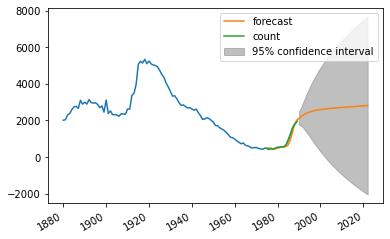

In [17]:
from statsmodels.tsa.arima_model import ARIMA

#80-20 split of train and test data
train = emma[:110].drop("name",axis=1) 
test = emma[110:].drop("name",axis=1)  

model = ARIMA(train, order=(2, 1, 2))
res = model.fit(disp=-1)

fig, ax = plt.subplots()
ax.plot(train);

res.plot_predict('1975', '2022', ax=ax);

In [18]:
noah = groupby2[groupby2.name == 'Noah']
noah.year = pd.to_datetime(noah.year)

noah.year = noah.year.astype(str)
noah.year = noah.year.str.replace('1970-01-01 00:00:00.00000', '')
noah.year = pd.to_datetime(noah.year)
noah = noah.set_index("year")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JA

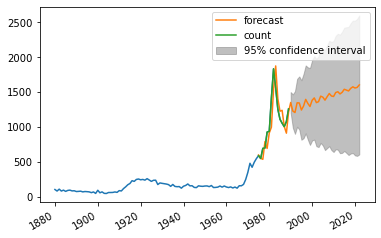

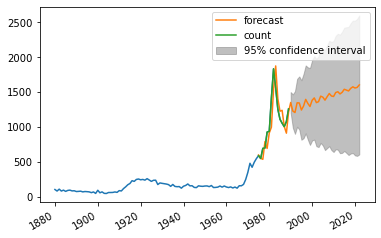

In [19]:
#80-20 split of train and test data
train = noah[:110].drop("name",axis=1) 
test = noah[110:].drop("name",axis=1)  

model = ARIMA(train, order=(2, 1, 2))
res = model.fit(disp=1)

fig, ax = plt.subplots()
ax.plot(train);

res.plot_predict('1975', '2022', ax=ax)

# 2. Counterfactual prediction testing

The [FRED](https://fred.stlouisfed.org) database has economic data useful for this question.

A common method to test the effect of a one-off event is to fit an ARIMA model up to the event, and compare the forecast to the actual data of what happened, then measure the gap between the forecast and the event data.

1. Use GDP and unemployment data with the Counterfactual prediction testing methodology to get an estimate of the magnitude of COVID (around March 2020 as a cutoff date) on these two statistics. Use an ARIMA model which fits best to the pre-COVID time series and compare the output of both. Provide a visualization.

2. Is GDP a unit root process or trend stationary? Use the 2008 and 2020 GDP shocks and statistical tests we've seen in class to provide an argument (it's possible event one says one thing and the other event says the opposite).

In [26]:
# Use GDP and unemployment data with the Counterfactual prediction testing 
# methodology to get an estimate of the magnitude of COVID

unemployment = pd.read_csv('unemployment.csv')
gdp = pd.read_csv('gdp.csv')

In [24]:
gdp["DATE"] = pd.to_datetime(gdp['DATE'])
gdp = gdp.set_index("DATE")
gdp

,GDP
DATE,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2019-10-01,21747.394
2020-01-01,21561.139
2020-04-01,19520.114


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OC

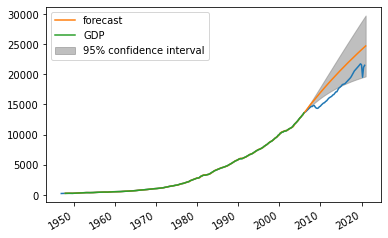

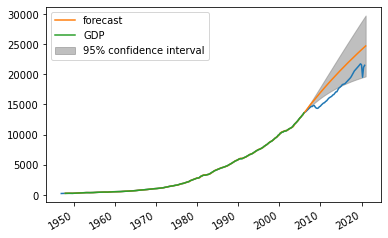

In [25]:
gdp_train = gdp.iloc[:237]
gdp_test = gdp.iloc[237:]

model = ARIMA(gdp_train, order=(2,1,2))
res = model.fit(disp=-1)

fig, ax = plt.subplots()
ax.plot(gdp)

res.plot_predict('1948', '2021', ax=ax)

In [27]:
#Can see on the plot the yellow line indicates how the GDP should have grown and the blue line shows the reality

In [28]:
unemployment["DATE"] = pd.to_datetime(unemployment['DATE'])
unemployment = unemployment.set_index("DATE")
unemployment

,UNRATE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2020-11-01,6.7
2020-12-01,6.7
2021-01-01,6.3


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warn

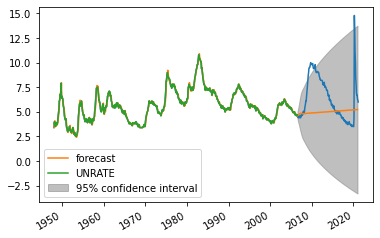

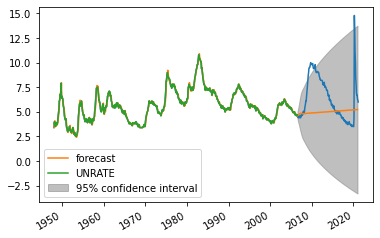

In [32]:
unemployment_train = unemployment.iloc[:703]
unemployment_test = unemployment.iloc[703:]

model = ARIMA(unemployment_train, order=(2,1,2))
res = model.fit(disp=-1)

fig, ax = plt.subplots()
ax.plot(unemployment)

res.plot_predict('1948', '2021', ax=ax)

In [39]:
gdp = pd.read_csv('gdp.csv')
gdp["DATE"] = pd.to_datetime(gdp['DATE'])
gdp = gdp.set_index("DATE")
gdp

,GDP
DATE,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2019-10-01,21747.394
2020-01-01,21561.139
2020-04-01,19520.114


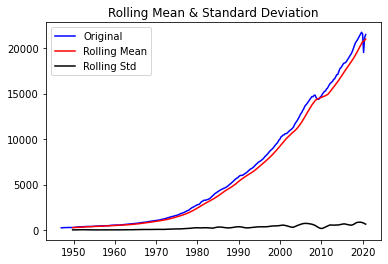

Results of Dickey-Fuller Test:


Test Statistic                   3.570367
p-value                          1.000000
#Lags Used                       3.000000
Number of Observations Used    292.000000
Critical Value (1%)             -3.452945
Critical Value (5%)             -2.871490
Critical Value (10%)            -2.572071
dtype: float64

In [40]:
# Is GDP a unit root process or trend stationary?

#Using code from class
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

test_stationarity(gdp)

**From the results it seems like the data has a unit root and is non-stationary as the test statistic is higher than the critical value**